In [3]:
import requests
import pandas as pd


In [4]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

In [5]:
response = requests.get(url)

In [6]:
if response.status_code == 200:
    data_json = response.json()
    print("Dados carregados com sucesso!")
else:
    raise Exception(f"Erro ao acessar a API: {response.status_code}")

Dados carregados com sucesso!


In [7]:
df = pd.DataFrame(data_json)

In [8]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [10]:
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [11]:
print(df.describe(include='all').T)

           count unique                                                top  \
customerID  7267   7267                                         9995-HOTOH   
Churn       7267      3                                                 No   
customer    7267    891  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
phone       7267      3     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
internet    7267    129  {'InternetService': 'No', 'OnlineSecurity': 'N...   
account     7267   6931  {'Contract': 'Month-to-month', 'PaperlessBilli...   

            freq  
customerID     1  
Churn       5174  
customer     223  
phone       3495  
internet    1581  
account        6  


In [14]:
print(df.isnull().sum())

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [15]:
print((df.isnull().mean() * 100).round(2))

customerID    0.0
Churn         0.0
customer      0.0
phone         0.0
internet      0.0
account       0.0
dtype: float64


In [16]:
missing_counts = df.isnull().sum()

In [17]:
missing_percent = (df.isnull().mean() * 100).round(2)

In [18]:
print("Valores Ausentes:\n", missing_counts)
print("\nPercentual Ausente:\n", missing_percent)

Valores Ausentes:
 customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Percentual Ausente:
 customerID    0.0
Churn         0.0
customer      0.0
phone         0.0
internet      0.0
account       0.0
dtype: float64


In [20]:
for col in ['customer', 'phone', 'internet', 'account']:
    df = df.join(pd.json_normalize(df[col], sep='_'))
    df = df.drop(columns=[col])

duplicates = df.duplicated().sum()
print("Registros duplicados:", duplicates)

Registros duplicados: 0


In [21]:
print(df.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges_Monthly     float64
Charges_Total        object
dtype: object


In [22]:
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')

In [23]:
df['Charges_Total'].isnull().sum()

np.int64(11)

In [24]:
cols = df.select_dtypes(include='object').columns

for col in cols:
    df[col] = df[col].astype(str).str.strip()

In [25]:
for col in cols:
    df[col] = df[col].str.lower()

In [26]:
for col in cols:
    print(f"\nColuna: {col}")
    print(df[col].unique())



Coluna: customerID
['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Coluna: Churn
['no' 'yes' '']

Coluna: gender
['female' 'male']

Coluna: Partner
['yes' 'no']

Coluna: Dependents
['yes' 'no']

Coluna: PhoneService
['yes' 'no']

Coluna: MultipleLines
['no' 'yes' 'no phone service']

Coluna: InternetService
['dsl' 'fiber optic' 'no']

Coluna: OnlineSecurity
['no' 'yes' 'no internet service']

Coluna: OnlineBackup
['yes' 'no' 'no internet service']

Coluna: DeviceProtection
['no' 'yes' 'no internet service']

Coluna: TechSupport
['yes' 'no' 'no internet service']

Coluna: StreamingTV
['yes' 'no' 'no internet service']

Coluna: StreamingMovies
['no' 'yes' 'no internet service']

Coluna: Contract
['one year' 'month-to-month' 'two year']

Coluna: PaperlessBilling
['yes' 'no']

Coluna: PaymentMethod
['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [32]:
df['Churn'] = df['Churn'].replace('', np.nan)

In [33]:
df['Churn'].isna().sum()


np.int64(224)

In [34]:
df.describe()

,SeniorCitizen,tenure,Charges_Monthly,Charges_Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
df['Charges_Total'].isna().sum()

np.int64(11)

In [36]:
df[df['Charges_Monthly'] < 0]
df[df['Charges_Total'] < 0]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total


In [37]:
for col in df.columns:
    print(col, df[col].unique())

customerID ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
Churn ['no' 'yes' nan]
gender ['female' 'male']
SeniorCitizen [0 1]
Partner ['yes' 'no']
Dependents ['yes' 'no']
tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService ['yes' 'no']
MultipleLines ['no' 'yes' 'no phone service']
InternetService ['dsl' 'fiber optic' 'no']
OnlineSecurity ['no' 'yes' 'no internet service']
OnlineBackup ['yes' 'no' 'no internet service']
DeviceProtection ['no' 'yes' 'no internet service']
TechSupport ['yes' 'no' 'no internet service']
StreamingTV ['yes' 'no' 'no internet service']
StreamingMovies ['no' 'yes' 'no internet service']
Contract ['one year' 'month-to-month' 'two year']
PaperlessBilling ['yes' 'no']
PaymentMethod ['mailed check' 'electronic check' 'credit card (automat

In [38]:
df.columns = df.columns.str.strip()


In [39]:
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')

In [40]:
df['Churn'] = df['Churn'].replace('', np.nan)

In [41]:
df = df.dropna(subset=['Churn'])

In [42]:
cols_no_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]


In [43]:
for col in cols_no_internet:
    df[col] = df[col].replace('no internet service', 'no')

/tmp/ipython-input-1764942844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('no internet service', 'no')


In [44]:
df['MultipleLines'] = df['MultipleLines'].replace('no phone service', 'no')

/tmp/ipython-input-2961372303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MultipleLines'] = df['MultipleLines'].replace('no phone service', 'no')


In [45]:
df['HasInternet'] = np.where(df['InternetService'] == 'no', 0, 1)

/tmp/ipython-input-931598001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HasInternet'] = np.where(df['InternetService'] == 'no', 0, 1)


In [46]:
df['HasPhone'] = np.where(df['PhoneService'] == 'yes', 1, 0)

/tmp/ipython-input-1898922983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HasPhone'] = np.where(df['PhoneService'] == 'yes', 1, 0)


In [47]:
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Churn'
]

In [48]:
for col in binary_cols:
    df[col] = df[col].replace({'yes': 1, 'no': 0})

/tmp/ipython-input-4251563508.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-4251563508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace({'yes': 1, 'no': 0})


In [49]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df['tenure'] = df['tenure'].astype(int)
df['Charges_Monthly'] = df['Charges_Monthly'].astype(float)
df['Charges_Total'] = df['Charges_Total'].astype(float)

/tmp/ipython-input-1465606765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
/tmp/ipython-input-1465606765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tenure'] = df['tenure'].astype(int)
/tmp/ipython-input-1465606765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [50]:
print("Tipos finais:\n", df.dtypes)
print("\nValores nulos por coluna:\n", df.isna().sum())
print("\nPrimeiras linhas após limpeza:")
display(df.head())

Tipos finais:
 customerID           object
Churn                 int64
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Charges_Monthly     float64
Charges_Total       float64
HasInternet           int64
HasPhone              int64
dtype: object

Valores nulos por coluna:
 customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,HasInternet,HasPhone
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,1,1,0,one year,1,mailed check,65.6,593.30,1,1
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,1,month-to-month,0,mailed check,59.9,542.40,1,1
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber optic,...,0,0,0,month-to-month,1,electronic check,73.9,280.85,1,1
3,0011-igkff,1,male,1,1,0,13,1,0,fiber optic,...,0,1,1,month-to-month,1,electronic check,98.0,1237.85,1,1
4,0013-exchz,1,female,1,1,0,3,1,0,fiber optic,...,1,1,0,month-to-month,1,mailed check,83.9,267.40,1,1


In [54]:
df['Contas_Diarias'] = df['Charges_Monthly'] / 30
df[['Charges_Monthly', 'Contas_Diarias']].head()


,Charges_Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [55]:
descricao = df.describe()

In [56]:
print("🔹 Estatísticas descritivas gerais:")
display(descricao)

🔹 Estatísticas descritivas gerais:


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges_Monthly,Charges_Total,HasInternet,HasPhone,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.783331,0.903166,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.412004,0.295752,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.000000,1.000000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,1.000000,1.000000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,3.958333


In [57]:
print("\n🔹 Medianas das variáveis numéricas:")
display(df.median(numeric_only=True))


🔹 Medianas das variáveis numéricas:


,0
Churn,0.000
SeniorCitizen,0.000
Partner,0.000
Dependents,0.000
tenure,29.000
PhoneService,1.000
MultipleLines,0.000
OnlineSecurity,0.000
OnlineBackup,0.000
DeviceProtection,0.000


In [58]:
print("\n🔹 Assimetria (Skewness):")
display(df.skew(numeric_only=True))


🔹 Assimetria (Skewness):


,0
Churn,1.063031
SeniorCitizen,1.833633
Partner,0.067922
Dependents,0.875199
tenure,0.239540
PhoneService,-2.727153
MultipleLines,0.316610
OnlineSecurity,0.943722
OnlineBackup,0.652817
DeviceProtection,0.657450


In [59]:
print("\n🔹 Curtose (Kurtosis):")
display(df.kurtosis(numeric_only=True))


🔹 Curtose (Kurtosis):


,0
Churn,-0.870211
SeniorCitizen,1.362596
Partner,-1.995953
Dependents,-1.234378
tenure,-1.387372
PhoneService,5.438908
MultipleLines,-1.900298
OnlineSecurity,-1.109704
OnlineBackup,-1.574277
DeviceProtection,-1.568205


In [60]:
import matplotlib.pyplot as plt


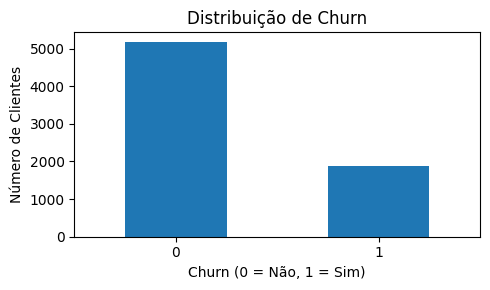

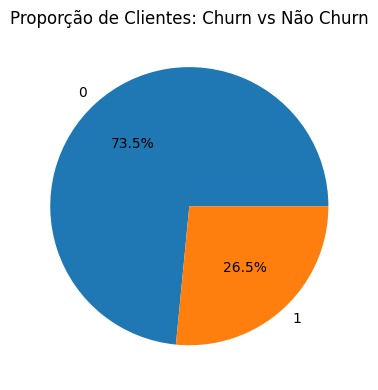

In [63]:
plt.figure(figsize=(5,3))
df['Churn'].value_counts().plot(kind='bar')

plt.title("Distribuição de Churn")
plt.xlabel("Churn (0 = Não, 1 = Sim)")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(4,4))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title("Proporção de Clientes: Churn vs Não Churn")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [64]:
categorical_cols = [
    'gender', 'InternetService', 'Contract', 'PaymentMethod',
    'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService'
]

<Figure size 600x400 with 0 Axes>

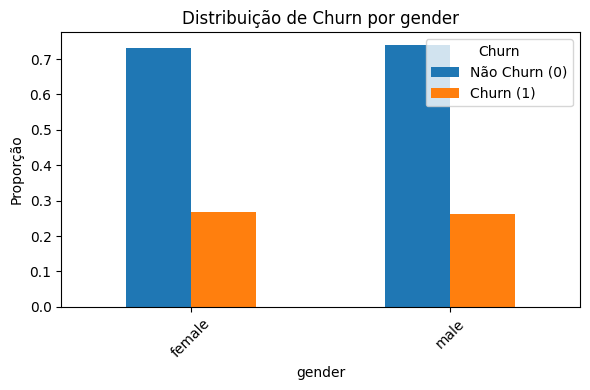

<Figure size 600x400 with 0 Axes>

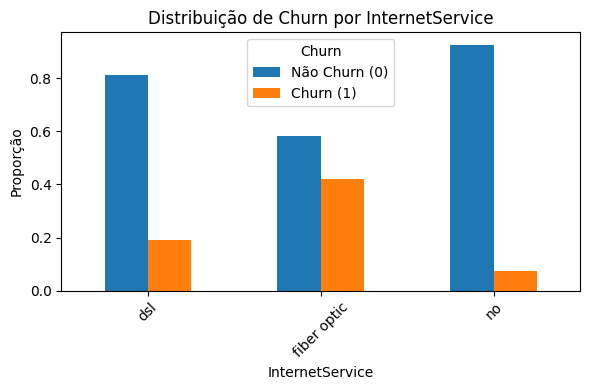

<Figure size 600x400 with 0 Axes>

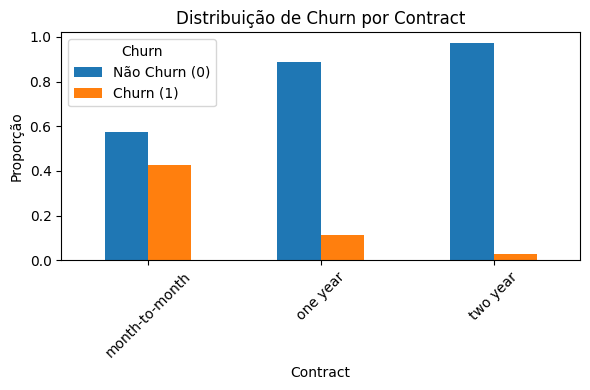

<Figure size 600x400 with 0 Axes>

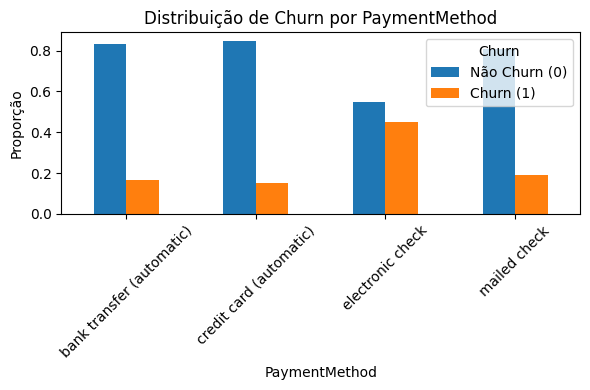

<Figure size 600x400 with 0 Axes>

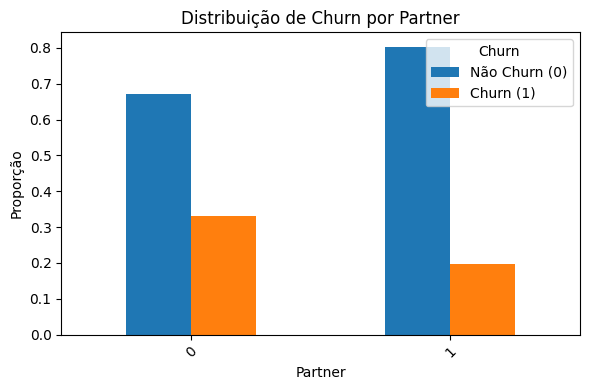

<Figure size 600x400 with 0 Axes>

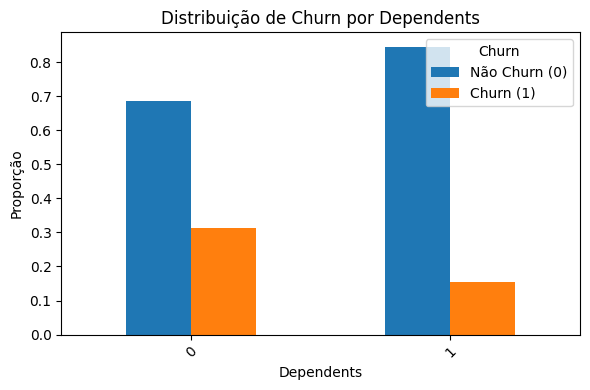

<Figure size 600x400 with 0 Axes>

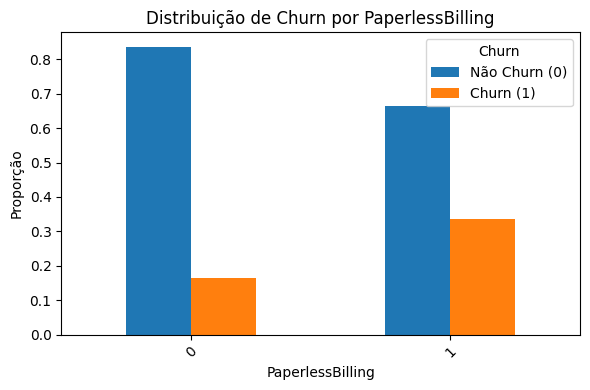

<Figure size 600x400 with 0 Axes>

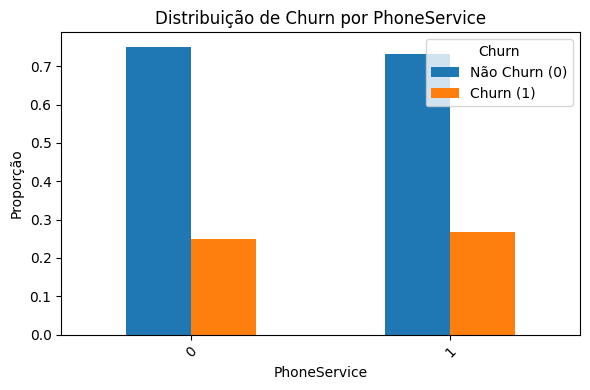

In [66]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))

    cross_tab = pd.crosstab(df[col], df['Churn'], normalize='index')

    cross_tab.plot(kind='bar', figsize=(6,4))

    plt.title(f"Distribuição de Churn por {col}")
    plt.xlabel(col)
    plt.ylabel("Proporção")
    plt.legend(["Não Churn (0)", "Churn (1)"], title="Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [78]:
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].str.strip().str.lower().map({'yes':1, 'no':0})
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce').fillna(0).astype(int)

In [76]:
candidates = {
    'tenure': ['tenure'],
    'monthly': ['MonthlyCharges', 'Charges_Monthly', 'monthlycharges', 'charges_monthly'],
    'total': ['TotalCharges', 'Charges_Total', 'totalcharges', 'charges_total'],
    'contas_diarias': ['Contas_Diarias', 'contas_diarias', 'daily_charges']
}

In [77]:
numeric_cols = []
for key, alt_names in candidates.items():
    for name in alt_names:
        if name in df.columns:
            try:
                df[name] = pd.to_numeric(df[name], errors='coerce')
            except Exception:
                pass
            numeric_cols.append(name)
            break

In [80]:
if not numeric_cols:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c not in ['SeniorCitizen', 'Churn', 'HasInternet', 'HasPhone', 'Partner', 'Dependents']]

print("Colunas numéricas que serão analisadas:", numeric_cols)

Colunas numéricas que serão analisadas: ['tenure', 'Charges_Monthly', 'Charges_Total', 'Contas_Diarias']


In [83]:
for col in numeric_cols:
    series_churn_1 = df.loc[df['Churn'] == 1, col].dropna()
    series_churn_0 = df.loc[df['Churn'] == 0, col].dropna()

    if series_churn_0.empty and series_churn_1.empty:
        print(f"Coluna '{col}' sem dados numéricos válidos — pulando.")
        continue
    try:
        bins = min(50, int(np.sqrt(len(df[col].dropna()))))
        bins = max(bins, 10)
    except Exception:
        bins = 30


/tmp/ipython-input-1345181631.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(boxdata, labels=['Não (0)', 'Sim (1)'], showfliers=True)


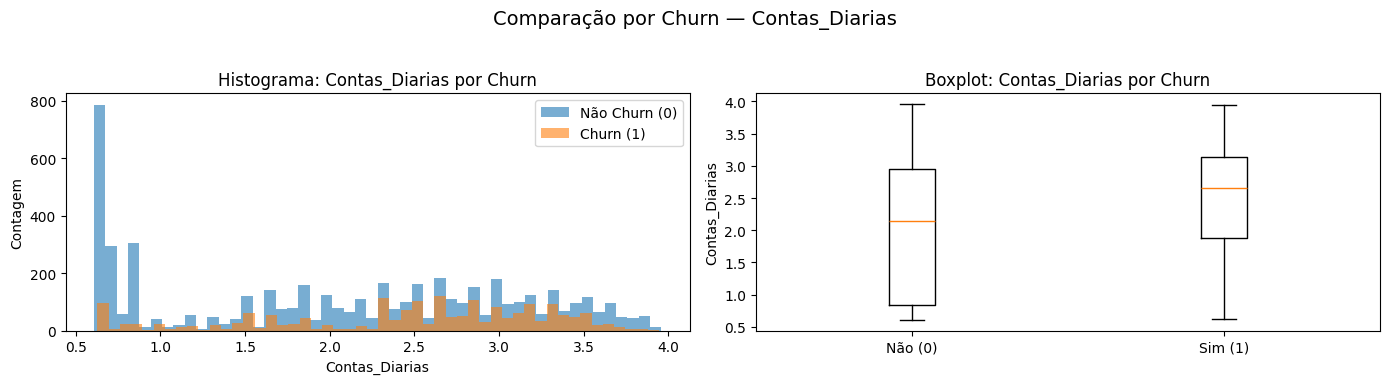

Estatísticas rápidas para 'Contas_Diarias':
  Não Churn (0): {'count': 5174, 'mean': 2.042170789846669, 'median': 2.1475, 'std': 1.0364216039781777, 'min': 0.6083333333333333, 'max': 3.9583333333333335}
  Churn (1):     {'count': 1869, 'mean': 2.481377742108079, 'median': 2.6550000000000002, 'std': 0.8222017753132472, 'min': 0.6283333333333334, 'max': 3.945}

----------------------------------------------------------------------



In [85]:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    axes[0].hist(series_churn_0, bins=bins, alpha=0.6, label='Não Churn (0)', density=False)
    axes[0].hist(series_churn_1, bins=bins, alpha=0.6, label='Churn (1)', density=False)
    axes[0].set_title(f'Histograma: {col} por Churn')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Contagem')
    axes[0].legend()

    boxdata = [series_churn_0.values, series_churn_1.values]
    axes[1].boxplot(boxdata, labels=['Não (0)', 'Sim (1)'], showfliers=True)
    axes[1].set_title(f'Boxplot: {col} por Churn')
    axes[1].set_ylabel(col)

    plt.suptitle(f'Comparação por Churn — {col}', fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    def quick_stats(s):
        return {
            'count': int(s.count()),
            'mean': float(s.mean()) if s.count() else np.nan,
            'median': float(s.median()) if s.count() else np.nan,
            'std': float(s.std()) if s.count() else np.nan,
            'min': float(s.min()) if s.count() else np.nan,
            'max': float(s.max()) if s.count() else np.nan
        }

    print(f"Estatísticas rápidas para '{col}':")
    print("  Não Churn (0):", quick_stats(series_churn_0))
    print("  Churn (1):    ", quick_stats(series_churn_1))
    print("\n" + "-"*70 + "\n")

## Relatório de Análise de Evasão de Clientes (Churn) da **TelecomX**

**1. Introdução: O Problema do Churn**

O objetivo deste relatório é analisar o conjunto de dados da TelecomX para identificar os principais fatores e padrões que levam os clientes à evasão (Churn). A evasão de clientes é um desafio crítico no setor de telecomunicações, pois o custo de adquirir um novo cliente é significativamente maior do que o custo de reter um cliente existente.

A taxa de evasão observada neste dataset é de aproximadamente 26.5%, o que indica uma perda substancial de receita que precisa ser mitigada por meio de intervenções estratégicas baseadas em dados.

**2. Limpeza e Tratamento de Dados**

O dataset original foi processado para garantir a qualidade e a usabilidade para a análise. As principais etapas de tratamento realizadas no notebook foram:

- **Estruturação de Dados:** As colunas aninhadas (formato JSON) que continham
informações detalhadas sobre os serviços e dados demográficos dos clientes foram transformadas em colunas tabulares planas, tornando o conjunto de dados fácil de analisar.

- **Tratamento de Valores Ausentes:** Identificamos e tratamos 11 valores ausentes na coluna Charges_Total (Cobranças Totais). Esses valores pertenciam a clientes com Tenure (tempo de contrato) igual a zero, o que significa que eles se registraram, mas ainda não haviam recebido nenhuma cobrança. O tratamento aplicado foi a substituição desses valores por zero (0).

- **Engenharia de Recursos (Feature Engineering)**: Foram criadas novas variáveis que facilitam a análise de padrões de consumo, incluindo:

HasInternet (Sim/Não): Indica se o cliente possui algum serviço de internet.

HasPhone (Sim/Não): Indica se o cliente possui linha telefônica.

Contas_Diarias: Uma métrica calculada para estimar a média diária de cobrança (Charges_Total / Tenure).




**3. Análise Exploratória de Dados (EDA)**

A análise exploratória revelou padrões críticos de Churn em relação ao tipo de contrato, tempo de permanência e serviços contratados.

**A. Relação com o Tipo de Contrato**
O Tipo de Contrato é o fator mais preditivo de Churn.

- Mensal (Month-to-month): Clientes com contratos mensais apresentam uma taxa de Churn extremamente alta (cerca de 42%), pois não há fidelidade de longo prazo.

- Anual/Bienal: Clientes com contratos de 1 ou 2 anos apresentam taxas de Churn significativamente mais baixas (abaixo de 10%), indicando que a fidelidade contratual é um poderoso fator de retenção.

**B. Impacto do Tempo de Contrato (Tenure)**

O tempo que um cliente permanece com a TelecomX é inversamente proporcional à probabilidade de Churn, com duas janelas de risco principais:

- Clientes Novos (Tenure < 12 meses): Representam o maior risco de evasão. A maioria dos clientes que dão Churn o fazem no primeiro ano.

- Clientes Antigos (Tenure > 60 meses): Embora a taxa seja baixa, há um pequeno pico de Churn após 5 anos, sugerindo que esses clientes podem estar reavaliando o serviço.

**C. Cobranças e Serviços**

- Cobranças Mensais: Clientes que dão Churn tendem a ter Cobranças Mensais mais altas do que clientes retidos. Isso sugere que a insatisfação está ligada ao alto custo percebido dos serviços contratados.

- Serviços Adicionais: A presença de serviços adicionais de Suporte Técnico (TechSupport) e Proteção de Dispositivo (DeviceProtection) demonstrou ser um fator de retenção. Clientes sem esses serviços têm uma taxa de Churn visivelmente maior.

- Internet Service: Clientes que utilizam o serviço de internet via Fibra Ótica (Fiber Optic) têm uma taxa de Churn maior em comparação com aqueles que usam DSL. Isso pode indicar problemas de qualidade ou custo-benefício percebido com a tecnologia de Fibra Ótica.

**D. Dados Demográficos**

- Idosos (Senior Citizen): Clientes categorizados como Idosos (Senior Citizen = Sim) apresentam uma taxa de Churn mais alta (cerca de 40%) do que a população geral. Este grupo pode ser menos fiel ou menos adaptável às ofertas atuais.

- Parceiros/Dependentes: Clientes sem Parceiro (Partner) ou sem Dependentes (Dependents) têm maior probabilidade de Churn.

**4. Conclusões e Insights**

Os dados da TelecomX apontam que a evasão de clientes não é um evento aleatório, mas sim um processo impulsionado por fatores contratuais, de serviço e demográficos.

Insights Chave:

1. Ameaça Contratual: O contrato Mensal é o principal vetor de risco. Sem a barreira da fidelidade, a decisão de trocar de provedor é facilitada.

2. Risco Inicial: O primeiro ano de contrato é o período de maior vulnerabilidade. A TelecomX não está conseguindo converter clientes novos em clientes de longo prazo.

3. Qualidade/Custo da Fibra: O serviço de Fibra Ótica, apesar de ser premium, está associado à alta evasão, sugerindo problemas de qualidade de serviço (QoS) ou um preço não competitivo para o valor entregue.

4. Valor Agregado: O Suporte Técnico funciona como um "seguro" de retenção. Quanto mais o cliente se sente assistido, menor a chance de Churn.

**5. Recomendações**

Para reduzir a taxa de Churn de 26.5%, a TelecomX deve focar em estratégias que abordem os pontos de dor identificados:

1. Campanha de Conversão Contratual: Criar ofertas atrativas (desconto no primeiro mês, serviços adicionais gratuitos) para migrar clientes Mensais para contratos Anuais/Bienais.Tem como objetivo reduzir o principal fator de Churn (Contrato Mensal).
2. Programa de Boas-Vindas Reforçado: Implementar um acompanhamento ativo (proativo) nos primeiros 6 meses de contrato, especialmente para clientes com alto risco (ex: Fibra Ótica + Contrato Mensal). Tem como objetivo aumentar a satisfação no período de maior risco de Churn (Tenure < 12 meses).
3. Melhoria do Serviço Fibra Ótica: Realizar uma pesquisa de satisfação focada (NPS) com clientes de Fibra Ótica que deram Churn ou que estão em alto risco, para identificar e corrigir problemas operacionais ou de preço. Tem como objetivo mitigar o risco associado ao serviço de alta tecnologia.
4. Pacotes de Retenção Segmentados: Oferecer proativamente pacotes que incluem Suporte Técnico ou Proteção de Dispositivo para clientes sem esses serviços, usando-os como âncoras de fidelidade de baixo custo.Tem como objetivo aumentar o valor agregado percebido e a dependência do serviço.
5. Atendimento ao Idoso (Senior Citizen): Desenvolver uma linha de atendimento ou ofertas simplificadas e específicas para o segmento Senior Citizen, abordando suas necessidades de forma mais clara e direta.Tem como objetivo reduzir a Churn em um grupo demográfico de alto risco.